# Agenda

- Conduct Basic EDA
- Process the data before conducting regression analysis
- Run Stasmodel OLS on the entire data and review the results
- Build a model using regression analysis to predict Insurance Cost based on different features
- Run predictions using different regression models and finding the best fit model based on training and test data accuracy

## Importing Library and Reading the Dataset

In [405]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modelling Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [406]:
#Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

In [407]:
#Read DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Vaibhav-1911/DATA-602/main/Assignment%205/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

## Feature Engineering

In [408]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [409]:
#Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                        np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [411]:
#Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

In [412]:
#Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
505,37,male,30.875,3,no,northwest,6796.86325,obese
397,21,male,31.020,0,no,southeast,16586.49771,obese
609,30,male,37.800,2,yes,southwest,39241.44200,obese
591,47,male,19.570,1,no,northwest,8428.06930,normal
685,53,male,26.410,2,no,northeast,11244.37690,overweight
626,36,male,28.880,3,no,northeast,6748.59120,overweight
547,54,female,46.700,2,no,southwest,11538.42100,obese
123,44,male,31.350,1,yes,northeast,39556.49450,obese
925,50,male,32.110,2,no,northeast,25333.33284,obese
474,54,male,25.100,3,yes,southwest,25382.29700,overweight


In [413]:
#Describe Categorical Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [414]:
#Describe Numerical Values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [415]:
#Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [416]:
#Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [417]:
#Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [418]:
#Check Children Feature
df.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [419]:
#Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

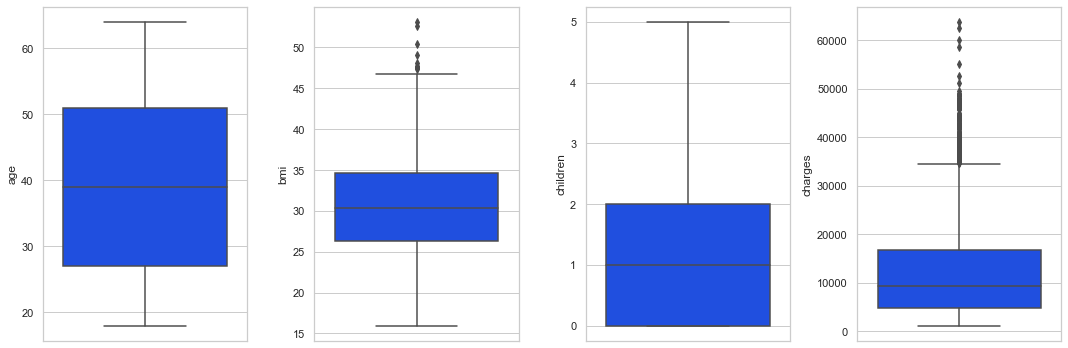

In [420]:
#Boxplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

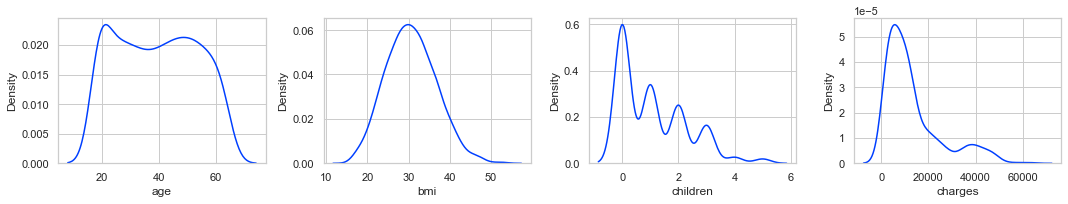

In [421]:
#KDEplot Visual
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

**We can see that the the relationship between No. of Children with respect to the instances where insurance rates are high is inversely propotional.**

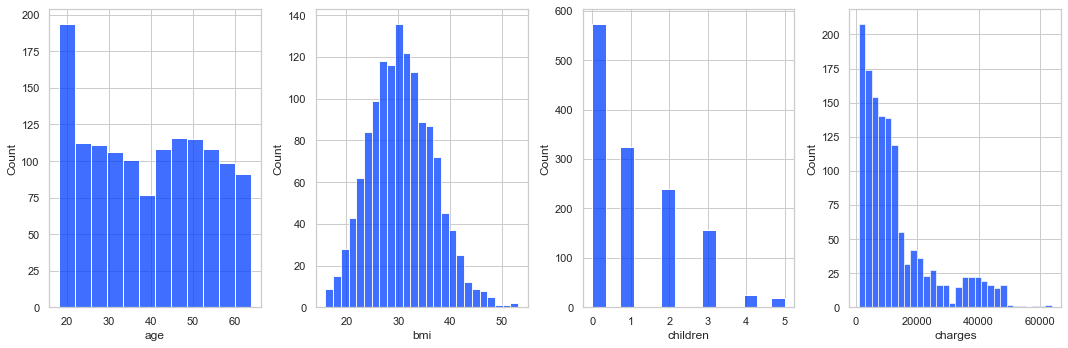

In [422]:
#Histplot Visual
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

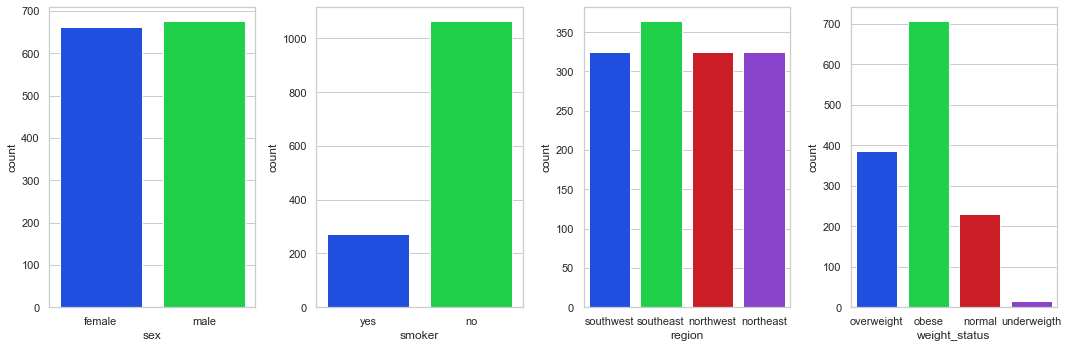

In [423]:
#Countplot Visual
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

## Multivariate Analysis

### Heatmap

<AxesSubplot:>

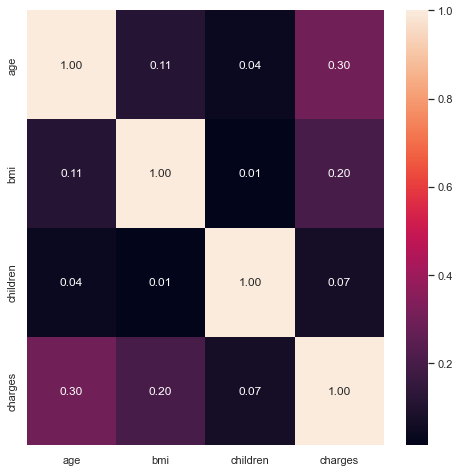

In [424]:
#Heatmap Correlation
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

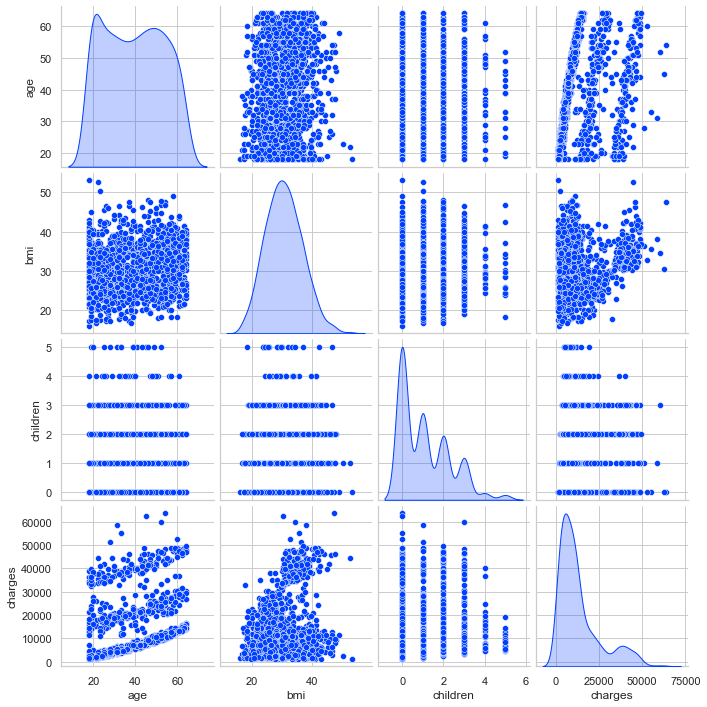

In [425]:
#Pairplot Visualization
sns.pairplot(df, diag_kind='kde')

- Charges seem to be on the higher side for people as their age increses
- Most of our data is right skewed when it comes to charges. Mostly people have insurance charges between the 5000 - 25000 dollars range.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

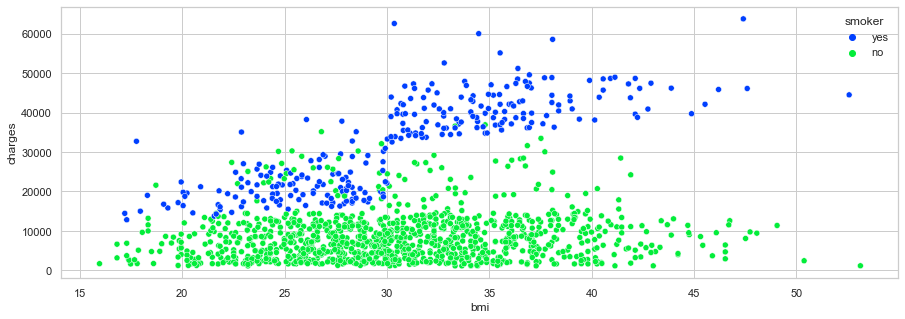

In [426]:
#Scatterplor Visualization
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

**A person who smokes and has a BMI above 30 tends to have a higher medical cost**

<AxesSubplot:xlabel='age', ylabel='charges'>

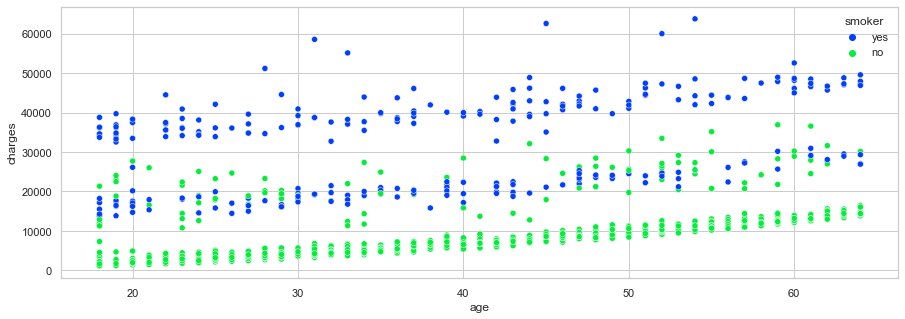

In [427]:
#Scatterplor Visualization
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

**Older people who are also smokers, have a higher insurance charge**

In [428]:
#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<AxesSubplot:xlabel='region', ylabel='charges'>

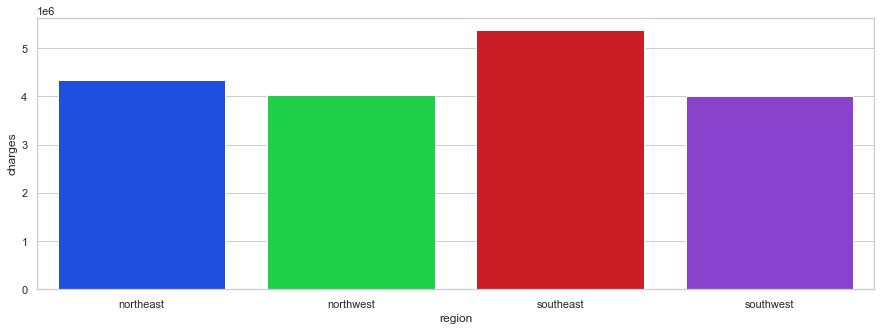

In [429]:
#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

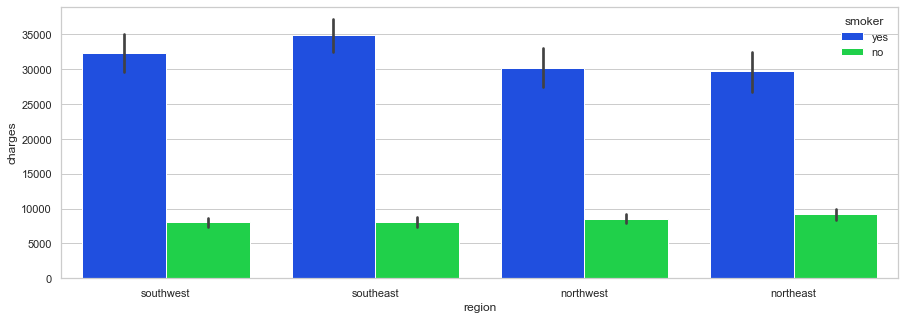

In [430]:
#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

<AxesSubplot:xlabel='region', ylabel='charges'>

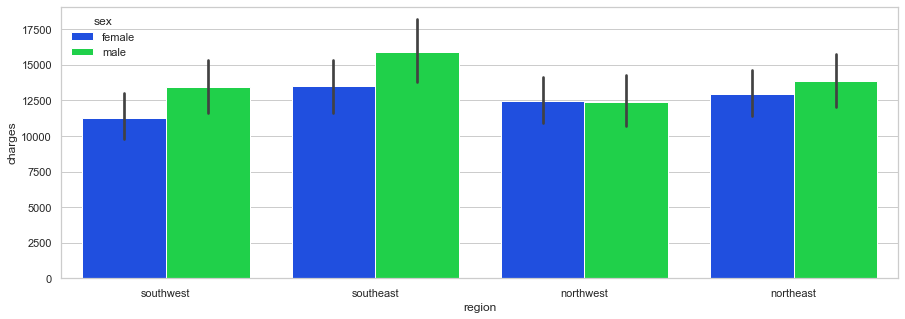

In [431]:
#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [432]:
#Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


<AxesSubplot:xlabel='sex', ylabel='count'>

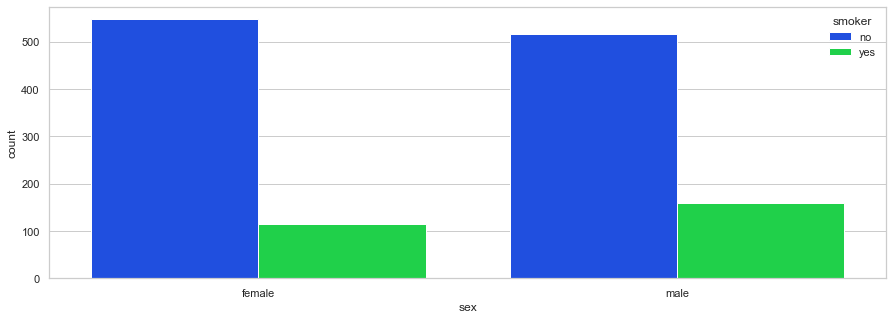

In [433]:
#Barplot Visualization
sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)

<AxesSubplot:xlabel='children', ylabel='charges'>

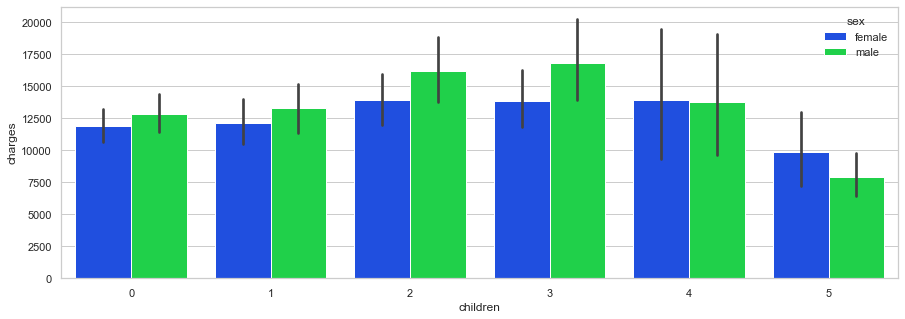

In [434]:
#Barplot with Hue Sex
sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

**There is no significant difference between insurance charges between males and females. However, it must be noted that people with 5 children have significantly less insurance charges when compared to people with 0-4 children.**

<AxesSubplot:xlabel='children', ylabel='charges'>

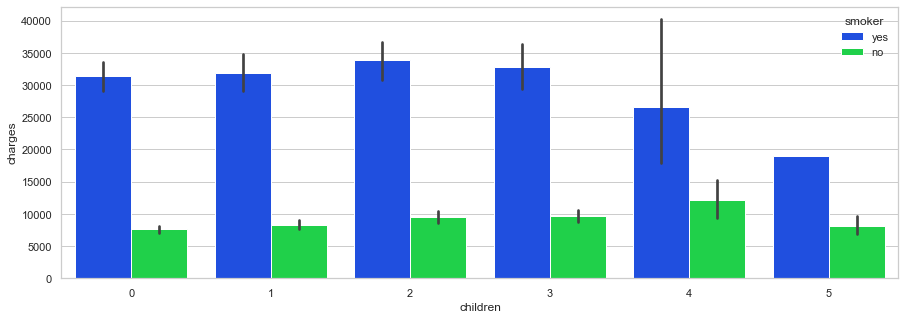

In [435]:
#Barplot with Hue Smoker
sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)

In [436]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


<AxesSubplot:xlabel='weight_status', ylabel='count'>

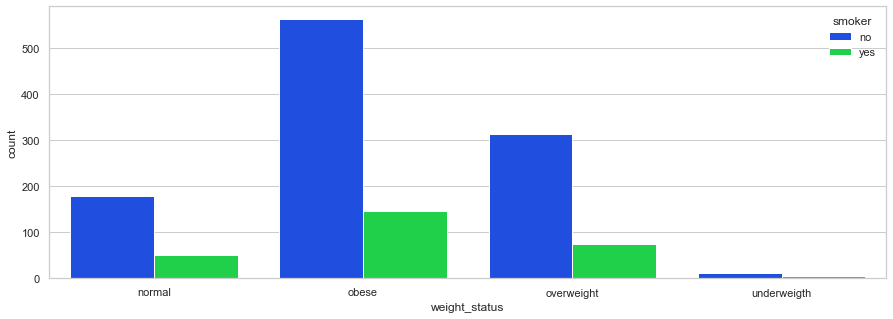

In [437]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [438]:
#Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [439]:
#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


<AxesSubplot:xlabel='weight_status', ylabel='count'>

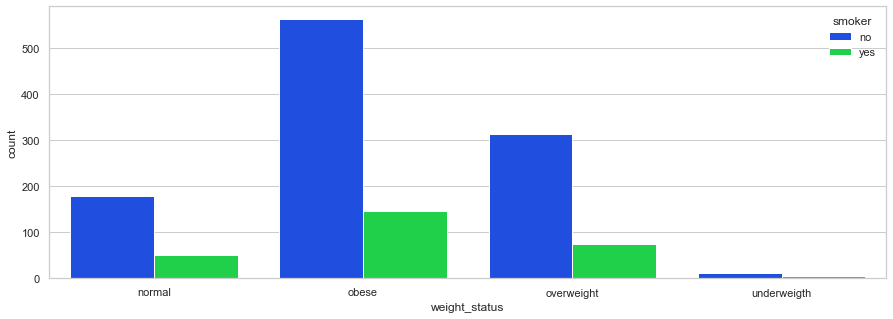

In [440]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [441]:
#Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [442]:
#Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


<AxesSubplot:xlabel='weight_status', ylabel='avg_charges'>

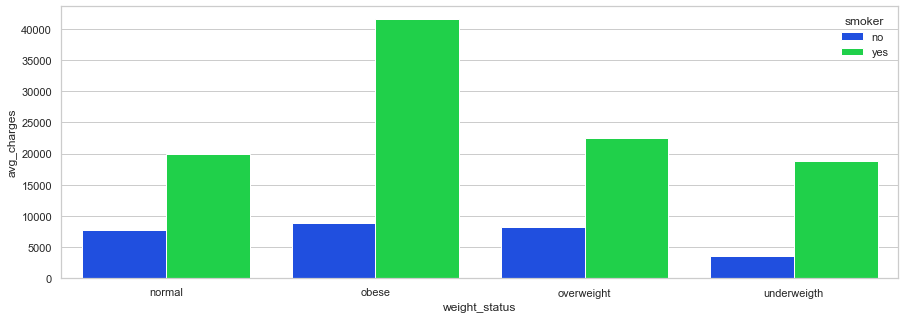

In [443]:
#Average Charges Barplot
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

**People who are obese and also smoke have very expensive insurance charges on an average. Also, smokers in general have higher insurance charges as compared to non-smokers**

In [444]:
#Check Missing Value
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

## Processing Data

In [445]:
#Check Duplicate Value
df.duplicated().sum()

1

In [446]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

In [447]:
#Copy DataFrame
dfcopy = df.copy()

### Running Statsmodel OLS Regression on the basis of a Single Feature i.e. "bmi"

In [448]:
xn = np.array(dfcopy['bmi']).reshape(-1,1)
yn = np.array(dfcopy['charges']).reshape(-1,1)

xn.shape, yn.shape

((1337, 1), (1337, 1))

In [449]:
from numpy.linalg import inv

const = np.ones(shape=yn.shape)
mat = np.concatenate( (const, xn), axis=1)

# first 5 examples
mat[:5,:]

array([[ 1.   , 27.9  ],
       [ 1.   , 33.77 ],
       [ 1.   , 33.   ],
       [ 1.   , 22.705],
       [ 1.   , 28.88 ]])

In [450]:
betas = inv(mat.transpose().dot(mat)).dot(mat.transpose()).dot(yn)
b0, b1 = betas

print(f'Beta 0: {np.round(b0[0],3)}')
print(f'Beta 1: {np.round(b1[0],3)}')

Beta 0: 1202.14
Beta 1: 393.856


In [451]:
yhat = mat.dot(betas)
yhat[:5, :]

array([[12190.71973182],
       [14502.65381323],
       [14199.384777  ],
       [10144.63837699],
       [12576.69850521]])

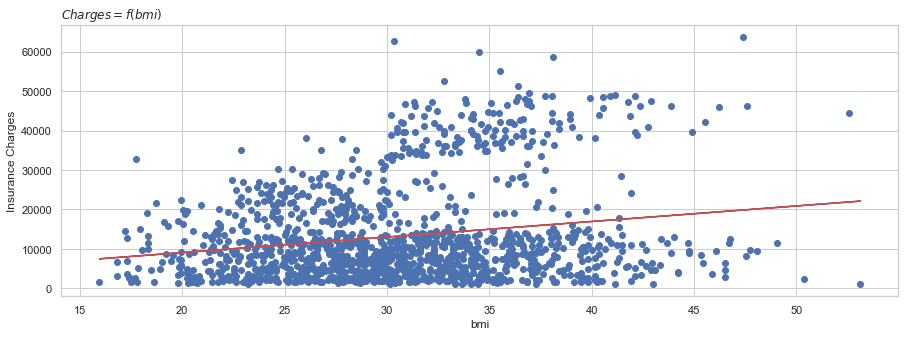

In [452]:
plt.plot(xn, yn, 'bo')
plt.plot(xn, yhat, 'r')
plt.xlabel('bmi')
plt.ylabel('Insurance Charges')
plt.title('$Charges=f(bmi)$', loc='left')
plt.show()

**We can see that there is a weak linear relationship when we consider only "bmi" feature.**

In [453]:
betas.reshape(1,-1)[0]

array([1202.14036707,  393.85589121])

In [454]:
import statsmodels.api as smf

simpleModel = smf.OLS(yn, mat).fit()
print(simpleModel.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.70
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.47e-13
Time:                        14:43:04   Log-Likelihood:                -14440.
No. Observations:                1337   AIC:                         2.888e+04
Df Residuals:                    1335   BIC:                         2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1202.1404   1664.857      0.722      0.4

**The R-Suare indicates the same**

### Running Statsmodel OLS Regression on the basis of another Single Feature i.e. "age"

In [455]:
xm = np.array(dfcopy['age']).reshape(-1,1)
ym = np.array(dfcopy['charges']).reshape(-1,1)

xm.shape, ym.shape

((1337, 1), (1337, 1))

In [456]:
from numpy.linalg import inv

const_m = np.ones(shape=ym.shape)
mat_m = np.concatenate( (const_m, xm), axis=1)

# first 5 examples
mat_m[:5,:]

array([[ 1., 19.],
       [ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       [ 1., 32.]])

In [457]:
betas_m = inv(mat_m.transpose().dot(mat_m)).dot(mat_m.transpose()).dot(ym)
b0_m, b1_m = betas_m

print(f'Beta 0: {np.round(b0_m[0],3)}')
print(f'Beta 1: {np.round(b1_m[0],3)}')

Beta 0: 3190.022
Beta 1: 257.23


In [458]:
yhat_m = mat_m.dot(betas_m)
yhat_m[:5, :]

array([[ 8077.38635387],
       [ 7820.15663635],
       [10392.45381153],
       [11678.60239912],
       [11421.37268161]])

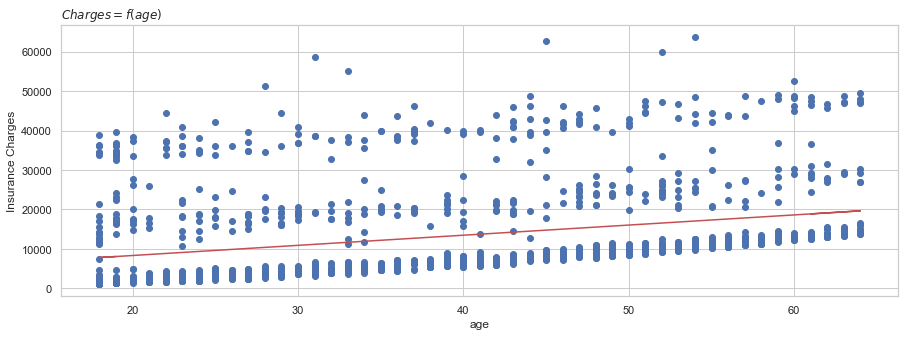

In [459]:
plt.plot(xm, ym, 'bo')
plt.plot(xm, yhat_m, 'r')
plt.xlabel('age')
plt.ylabel('Insurance Charges')
plt.title('$Charges=f(age)$', loc='left')
plt.show()

**Similar is the case with "age". There is a linear relation between te age and nsurance charges but by itself "age" is also not a very powerful feature**

In [460]:
betas_m.reshape(1,-1)[0]

array([3190.02172103,  257.22971752])

In [461]:
import statsmodels.api as smf

simpleModel_m = smf.OLS(ym, mat_m).fit()
print(simpleModel_m.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.98e-29
Time:                        14:44:20   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.0

### Observation:

- Its is pretty evident that we need to bring in more features to get the real picture of how Insurance Charges are dependent on different variables.

## Feature Transformation

In [462]:
#Ordinal Encoding
dfcopy['smoker'] = dfcopy['smoker'].replace({'yes' : 0, 'no' : 1})

#Final Encoding
sex_ori = pd.get_dummies(dfcopy['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfcopy['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfcopy['weight_status'], prefix = 'status')

#Concat Feature Encoding
dfcopy = pd.concat([dfcopy, sex_ori], axis=1)
dfcopy = pd.concat([dfcopy, region_ori], axis=1)
dfcopy = pd.concat([dfcopy, status_ori], axis=1)

In [463]:
#Drop Encoded Feature
dfcopy = dfcopy.drop(columns = ['sex', 'region', 'weight_status'])

#Check df
dfcopy

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,1,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1,1725.55230,0,1,0,0,1,0,0,1,0,0
2,28,33.000,3,1,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,1,21984.47061,0,1,0,1,0,0,1,0,0,0
4,32,28.880,0,1,3866.85520,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0,1,0,1,0,0,0,1,0,0
1334,18,31.920,0,1,2205.98080,1,0,1,0,0,0,0,1,0,0
1335,18,36.850,0,1,1629.83350,1,0,0,0,1,0,0,1,0,0
1336,21,25.800,0,1,2007.94500,1,0,0,0,0,1,0,0,1,0


In [464]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   uint8  
 6   sex_male            1337 non-null   uint8  
 7   reg_northeast       1337 non-null   uint8  
 8   reg_northwest       1337 non-null   uint8  
 9   reg_southeast       1337 non-null   uint8  
 10  reg_southwest       1337 non-null   uint8  
 11  status_normal       1337 non-null   uint8  
 12  status_obese        1337 non-null   uint8  
 13  status_overweight   1337 non-null   uint8  
 14  status_underweigth  1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.7 K

In [465]:
#Grouping Features for Normalization
norm_ori = dfcopy.drop(columns = ['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweigth'],
      dtype='object')


In [466]:
#Normalization Features
for i in range(len(norm_ori)):
    dfcopy[norm_ori[i]] = MinMaxScaler().fit_transform(dfcopy[norm_ori[i]].values.reshape(len(dfcopy), 1))

In [467]:
#Check dfcopy
dfcopy

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,0.021739,0.321227,0.0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,1.0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [468]:
xzz = dfcopy.loc[:, dfcopy.columns != "charges"]
yzz = dfcopy.loc[:, "charges"]

xzz = smf.add_constant(xzz)
modelzz = smf.OLS(yzz, xzz)

resultszz = modelzz.fit()
resultszz.params

print(resultszz.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 12 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:44:42   Log-Likelihood:                -13524.
No. Observations:                1337   AIC:                         2.707e+04
Df Residuals:                    1325   BIC:                         2.714e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.164e+04    388

### Observation:

- If we look at R-Sqaured value it is 0.756 it seems that it is a quite well fit model.
- Moreover, our Adj. R Squared is also 0.754 which is not too far from the R-Sqaured value. This indicates that the model we are using does not include any feature that is blowing the overall model performance out of proportion.
- Also, we have a very high F-Statistic value of 372.8 and P- Value of the F-Statistic as 0. This implies that there is a good degree of linear relationship between our Features and Target Variable.
- Furthermore, most of our features look like they are preety relevant in determining how the model performs except for the feature "status_underweight". The P value for this feature is at 0.190 which is a little higher than the standard 0.05. This could be a possible indication that this feature is not very relevant to our model and we may choose to drop it.

## Sklearn Modelling

In [472]:
#Model Evaluation
def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [473]:
#Best Hyperparameter Evaluation
def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [474]:
#Best Feature Importance Evaluation
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [486]:
#Separating Target & Features
x1 = dfcopy.drop(columns = ['charges']) #Features
y1 = dfcopy['charges'] #Target

x1

,age,bmi,children,smoker,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,0.021739,0.321227,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0.479150,0.2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [476]:
#Splitting Train & Test 
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [477]:
print(dfcopy['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [478]:
#Modeling
models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso()
}

for model_name, model in models.items():
    model.fit(xtrain1, ytrain1)
    prediction1 = model.predict(xtest1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, xtrain1, ytrain1, xtest1, ytest1), '\n')

Model: LinearRegression
MAE : 4366.55
RMSE : 6220.67
R2 score : 0.77
Train Accuracy : 0.7428349093845429
Test Accuracy : 0.7738593062757086
None 

Model: DecisionTree
MAE : 2681.88
RMSE : 5889.75
R2 score : 0.80
Train Accuracy : 1.0
Test Accuracy : 0.7972789437120571
None 

Model: RandomForest
MAE : 2609.26
RMSE : 4825.08
R2 score : 0.86
Train Accuracy : 0.9759134595432641
Test Accuracy : 0.8639452387455979
None 

Model: Ridge
MAE : 4311.10
RMSE : 6238.13
R2 score : 0.77
Train Accuracy : 0.7431554038170928
Test Accuracy : 0.7725878147456857
None 

Model: Lasso
MAE : 4304.22
RMSE : 6222.44
R2 score : 0.77
Train Accuracy : 0.7432010617510405
Test Accuracy : 0.7737299357175587
None 



In [479]:
prediction1

array([ 8049.77615665,  4981.26261165, 14480.0073736 , 32117.74776915,
        8829.44536821, 13241.00033433, 30440.11895653,   707.26854476,
       11154.62286016,  9926.98120512, 10459.25211665, 31884.44755974,
       31810.6396986 , 15760.10637605, 10668.09882691,  8104.25528774,
        5022.77107342, 32166.9063715 ,  2603.30597349,  3842.51123057,
        4673.13872995, 29024.05257661, 13776.61549065, 28939.49036146,
       31243.2081316 ,  6243.59067999, 34718.97033043, 37342.6205108 ,
       13008.28319021, 14646.91264867,  8024.8499611 , 12931.74590982,
         135.73669812, 10970.41983675, 37274.61381253, 12944.94580591,
        3267.09081945,  4195.25564004, 31018.17563194,  7948.00491036,
        6532.99488873, 30359.97807242, 35019.57757053, 13546.68980483,
        7663.22099195,  2666.37605782,  5576.68568425,  7279.10930068,
        3504.40790379, 10303.38856096,  7708.87012528, 10925.17440573,
       30623.04172018,  4610.60468916, 11268.72601087, 11407.9219887 ,
      

## Tuning Hyperparameter

In [480]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [481]:
#List Hyperparameters
hyperparameters = dict(
                       fit_intercept = [True, False],
                       n_jobs = [-1, 0, 1, 2],
                       normalize = [True, False],
                       copy_X = [True, False]
                      )

#Initiation
LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2')
LR_tuned1.fit(xtrain1, ytrain1)

# Predict & Evaluation
prediction1 = LR_tuned1.predict(xtest1)
evaluation(LR_tuned1, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4305.31
RMSE : 6221.51
R2 score : 0.77
Train Accuracy : 0.7432025636860959
Test Accuracy : 0.7737981066498896


In [482]:
#Check Best Hyperparameter
best_hyperparameter(LR_tuned1.best_estimator_, hyperparameters)

Best fit_intercept: False
Best n_jobs: 1
Best normalize: False
Best copy_X: False


In [483]:
alpha = [0.01, 0.1, 1, 2, 5, 10, 100]
solver = ['lsqr', 'auto', 'sag', 'saga', 'cholesky']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

Ridge1 = Ridge()
Ridge_tuned = RandomizedSearchCV(Ridge1, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
hyper_ridge = Ridge_tuned.fit(xtrain1, ytrain1)

In [484]:
prediction1 = hyper_ridge.predict(xtest1)
evaluation(hyper_ridge, prediction1, xtrain1, ytrain1, xtest1, ytest1)

MAE : 4312.37
RMSE : 6229.02
R2 score : 0.77
Train Accuracy : 0.7431790989612017
Test Accuracy : 0.7732512319942584


In [485]:
#Check Best Hyperparameter
best_hyperparameter(hyper_ridge.best_estimator_, hyperparameters)

Best alpha: 0.1
Best solver: lsqr
Best fit_intercept: True


## Conclusion

- On the basis of predictive modeling, Linear Regression algorithm has the best score compared to the others, with MAE Score 4366.55, RMSE Score 6220.67, & R2 Score 0.77. The Linear Regression algorithm is fit based on the train & test accuracy.

- Our Statsmodel OLS regression model predicted quite well if we compare it wih the results of the SKlearn Regression model. However, the SKlearn model is more accurate.